In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
    
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
BATCH_SIZE = 32
IMG_HEIGHT = 200
IMG_WIDTH = 200

In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  "/kaggle/input/cat-and-dog/training_set/training_set/",
  validation_split=0.2,
  labels='inferred',
  label_mode = 'binary',
  subset="training",
  seed=123,
  class_names = ['cats', 'dogs'],
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE)

Found 8005 files belonging to 2 classes.
Using 6404 files for training.


In [4]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  "/kaggle/input/cat-and-dog/training_set/training_set/",
  validation_split=0.2,
  labels='inferred',
  label_mode = 'binary',
  subset="validation",
  seed=123,
  class_names = ['cats', 'dogs'],
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE)

Found 8005 files belonging to 2 classes.
Using 1601 files for validation.


In [5]:
CLASSES = train_ds.class_names
print(CLASSES)

['cats', 'dogs']


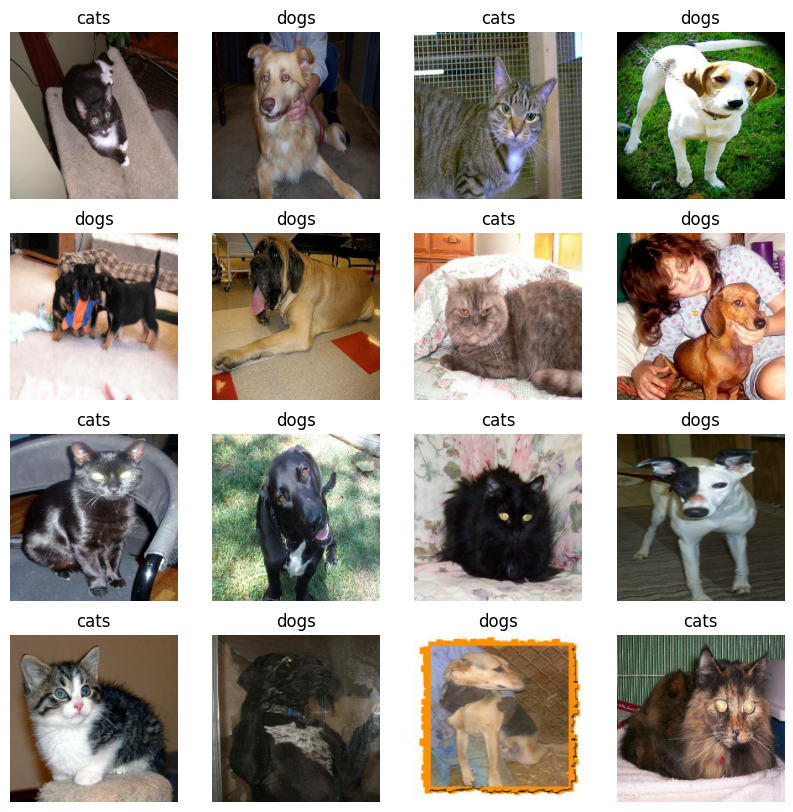

In [6]:
import matplotlib.pyplot as plt

# Define a function to display images
def display_images(dataset, rescale=False):
    plt.figure(figsize=(10, 10))
    for image, labels in dataset.take(1):
        for i in range(16):
            label_idx = int(labels[i].numpy())
            ax = plt.subplot(4, 4, i + 1)
            if rescale:
                plt.imshow(image[i].numpy())
            else:
                plt.imshow(image[i].numpy().astype("uint8"))
            plt.title(CLASSES[label_idx])
            plt.axis("off")
    plt.show()

# Display images without rescaling
display_images(train_ds)

In [7]:
def image_rescaling(image, label):
    return image/255, label

In [8]:
train_ds = train_ds.map(image_rescaling)

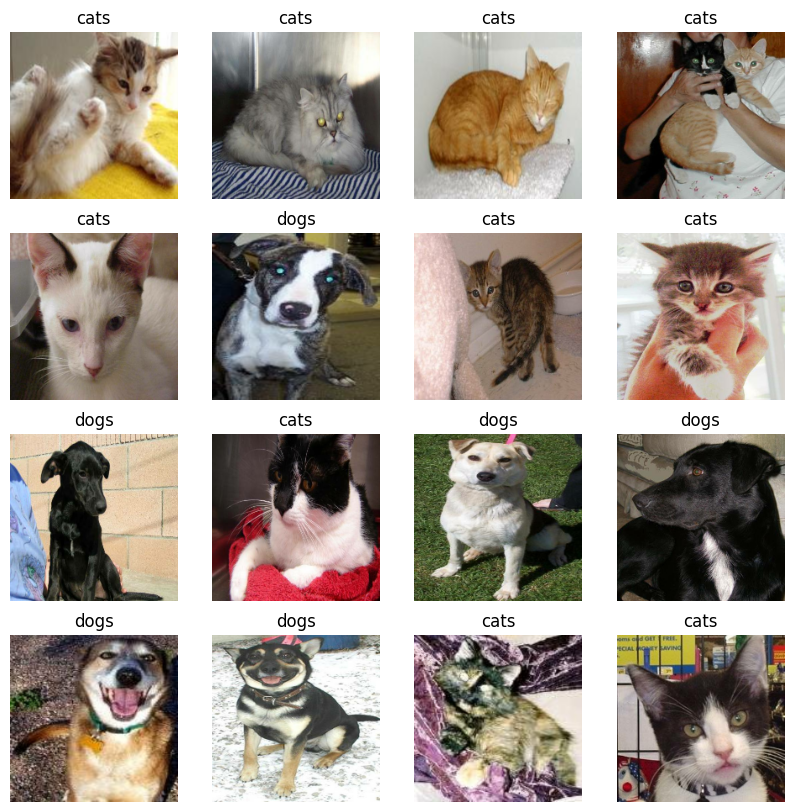

In [9]:
val_ds = val_ds.map(image_rescaling)
display_images(val_ds, rescale=True)

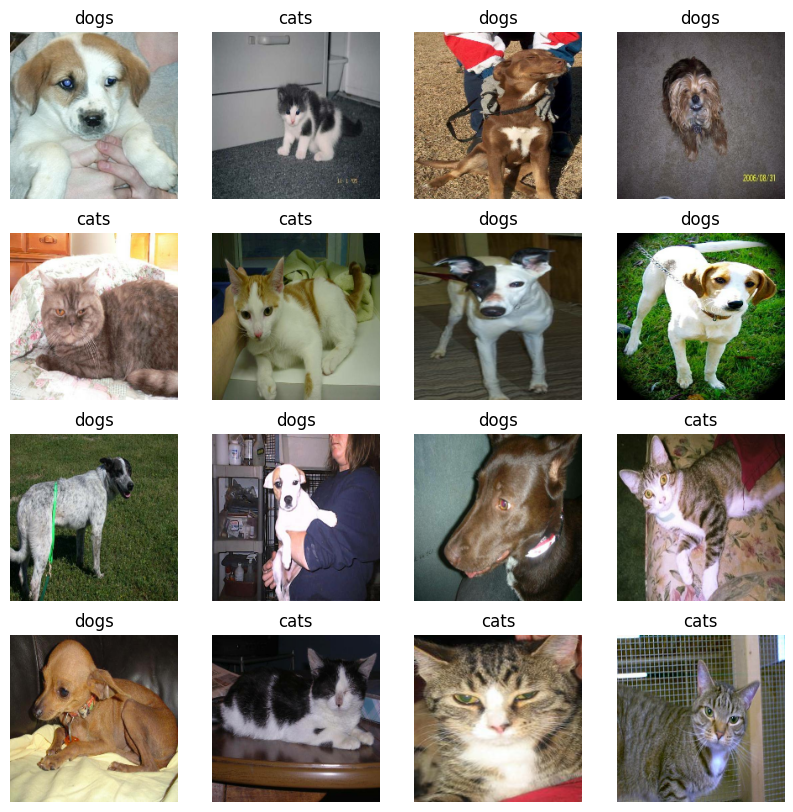

In [10]:
display_images(train_ds, rescale=True)

In [11]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

## LeNet CNN Architecture

In [33]:
lenet = tf.keras.Sequential([
    InputLayer(input_shape = (IMG_HEIGHT, IMG_WIDTH,3), batch_size=BATCH_SIZE),
    
    # first CNN Layer
    Conv2D(filters=6, kernel_size=5, activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2),strides=2),
    
    # second CNN Layer
    Conv2D(filters=16, kernel_size=5, activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2),strides=2),
    
    # flattening to 1D
    Flatten(),
    
    # fully connected neural network
    Dense(1000, activation="relu"),
    BatchNormalization(),
    Dense(100, activation="relu"),
    BatchNormalization(),
    Dense(1, activation="sigmoid")
])

print(lenet.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (32, 196, 196, 6)         456       
                                                                 
 batch_normalization_13 (Ba  (32, 196, 196, 6)         24        
 tchNormalization)                                               
                                                                 
 max_pooling2d_6 (MaxPoolin  (32, 98, 98, 6)           0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (32, 94, 94, 16)          2416      
                                                                 
 batch_normalization_14 (Ba  (32, 94, 94, 16)          64        
 tchNormalization)                                               
                                                      

In [35]:
lenet.compile(optimizer= Adam(learning_rate=0.01), loss=BinaryCrossentropy(), metrics='accuracy')

In [36]:
history = lenet.fit(train_ds, validation_data=val_ds,epochs=20, verbose=1)

Epoch 1/20
201/201 [==============================] - 9s 30ms/step - loss: 0.6920 - accuracy: 0.5856 - val_loss: 1.8373 - val_accuracy: 0.4978
Epoch 2/20
201/201 [==============================] - 6s 29ms/step - loss: 0.5993 - accuracy: 0.6668 - val_loss: 0.6293 - val_accuracy: 0.6627
Epoch 3/20
201/201 [==============================] - 6s 29ms/step - loss: 0.5043 - accuracy: 0.7470 - val_loss: 0.8046 - val_accuracy: 0.6334
Epoch 4/20
201/201 [==============================] - 6s 29ms/step - loss: 0.4734 - accuracy: 0.7714 - val_loss: 1.0019 - val_accuracy: 0.5878
Epoch 5/20
201/201 [==============================] - 6s 29ms/step - loss: 0.4477 - accuracy: 0.7823 - val_loss: 0.8145 - val_accuracy: 0.5915
Epoch 6/20
201/201 [==============================] - 6s 29ms/step - loss: 0.3906 - accuracy: 0.8226 - val_loss: 1.5767 - val_accuracy: 0.5553
Epoch 7/20
201/201 [==============================] - 6s 29ms/step - loss: 0.3162 - accuracy: 0.8676 - val_loss: 1.5244 - val_accuracy: 0.6440

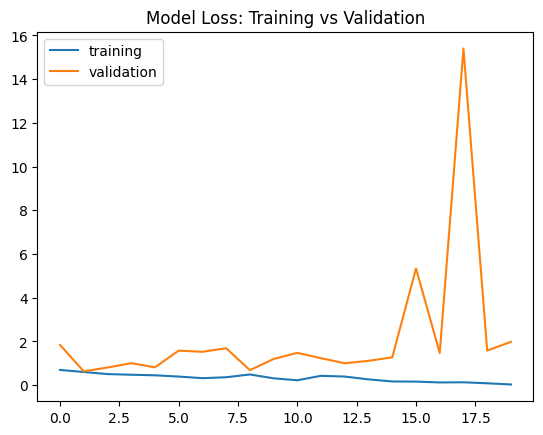

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title("Model Loss: Training vs Validation")
plt.show()

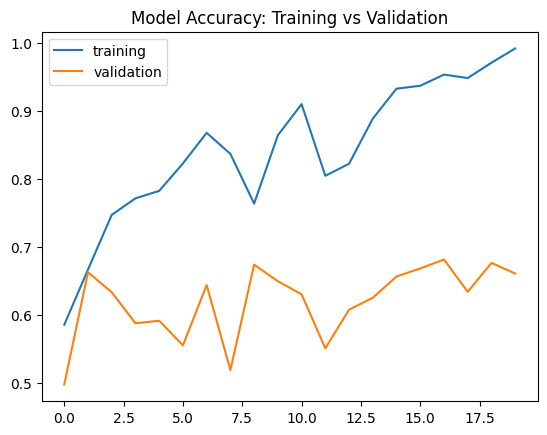

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy: Training vs Validation")
plt.legend(['training', 'validation'])
plt.show()